# <center> <u> Network Theory 2024 Projektityö </u> </center>

## <center> Bianconi-Barabasi malli</center>

In [1]:
# paketit

import networkx as nx
import multiprocess as mltp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from BianconiBarabasiModel import bbModelWrap as BB

### Laatu jakaumat
Testataan ensin, että generoidut laadut seuraavat haluttuja jakaumia. Simuloidaan kymmenen verkostoa molemmilla tyypeillä, 'uniform' ja 'BEC', jotta simulaation (pseudo)satunnaisten lukujen generaattori saa monta eri 'seediä' ja varmistamme, että tulokset eivät johdu vain yhdestä onnekkaasta simulaatiosta. Tasaisella jakaumalla muodostamme histogrammin suoraan laaduista ja Bose-Einstein kondensaatti jakauman tapauksessa laskemme laadusta solmun energian ja piirrämme histogrammin niistä. Yhden verkoston koko on 100 000 solmua ja jokainen uusi solmu luo kaksi uutta suoraa.

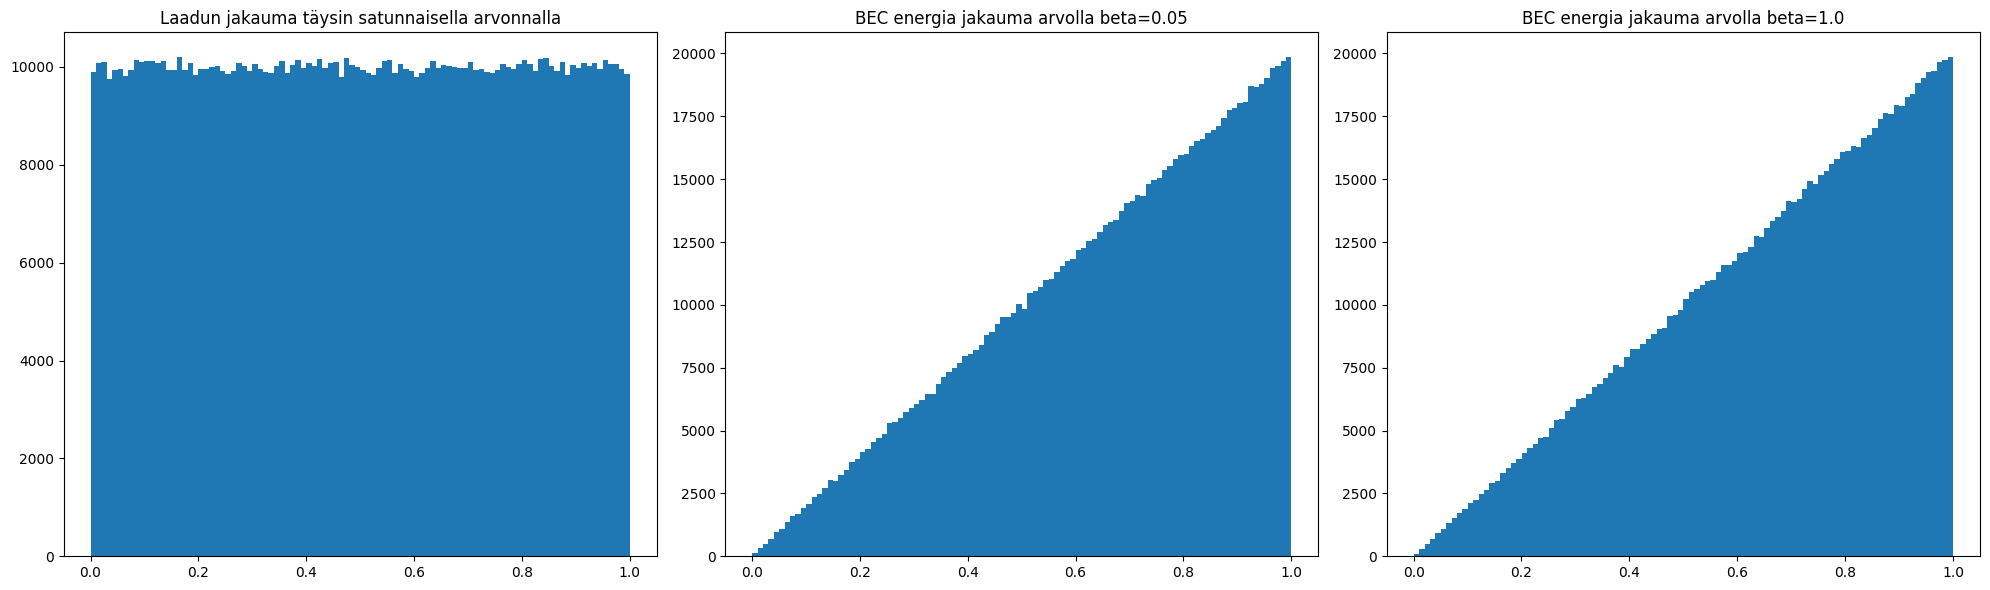

In [2]:
test_cases = [(1, "uniform"), (0.05, "BEC"), (1.0, "BEC")]

fig, axes = plt.subplots(1, 3, figsize=(20,6))
plot_index = 0
for case in test_cases:
    test_results = []
    for i in range(10):
        test_dict, test_edge = BB.generateBianconiBarabasi(100000, 2, case[0], case[1])
        test_fitns = np.array(list(test_dict.values()))
        if (case[1] == "BEC"):
            test_nrg = -np.log(test_fitns) / case[0]
            test_results.extend(test_nrg)
        else:
            test_results.extend(test_fitns)

    # test_results = np.array(test_result)
    # hist, bins = np.histogram(test_results, np.arange(0.0, 1.0, 0.05))
    # hist = hist / 10
    
    if (case[1] != "uniform"):
        axes[plot_index].hist(test_results, bins=100)
        axes[plot_index].title.set_text(f"{case[1]} energia jakauma arvolla beta={case[0]}")
        # axes[plot_index].set_xlim(0,1)
    else:
        axes[plot_index].hist(test_results, bins=100)
        axes[plot_index].title.set_text(f"Laadun jakauma täysin satunnaisella arvonnalla")
        # axes[plot_index].set_xlim(0,1)
    plot_index += 1
plt.tight_layout()
plt.show()

Näyttää oikealta! Piirrettään vielä histogrammit BEC tyypin verkoston laaduista.

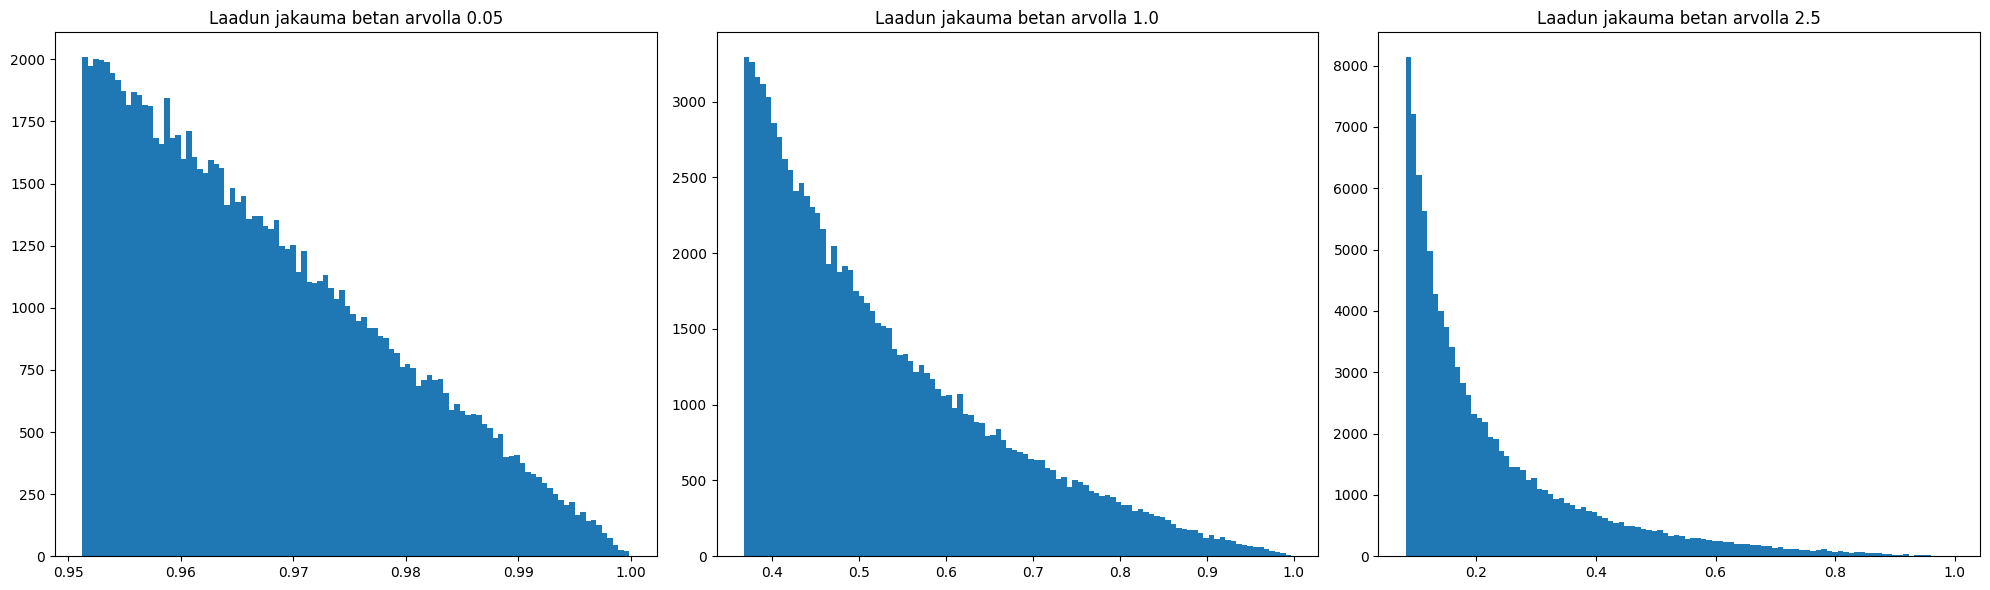

In [3]:
bec_fit1, _ = BB.generateBianconiBarabasi(100000, 2, 0.05, 'BEC')
bec_fit2, _ = BB.generateBianconiBarabasi(100000, 2, 1.0, 'BEC')
bec_fit3, _ = BB.generateBianconiBarabasi(100000, 2, 2.5, 'BEC')

fig, axes = plt.subplots(1, 3, figsize=(20,6))

axes[0].hist(list(bec_fit1.values()), bins=100, label='Simulaatio')
axes[1].hist(list(bec_fit2.values()), bins=100, label='Simulaatio')
axes[2].hist(list(bec_fit3.values()), bins=100, label='Simulaatio')

axes[0].title.set_text("Laadun jakauma betan arvolla 0.05")
axes[1].title.set_text("Laadun jakauma betan arvolla 1.0")
axes[2].title.set_text("Laadun jakauma betan arvolla 2.5")

plt.tight_layout()
plt.show()

### Pienet verkostot
Tämä koodi luo aina aluksi kymmenen solmun piirin, jota sen jälkeen lähdetään kasvattamaan Bianconi-Barabási (BB) mallin mukaisesti. Alla esimerkki tulos, kun generoivan funktion käsketään vain alustaa verkosto.

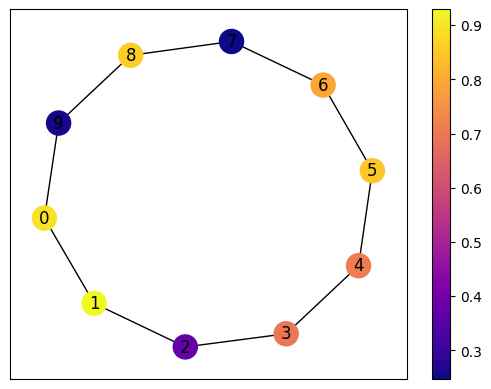

In [49]:
ex1_v, ex1_e = BB.generateBianconiBarabasi(e_amount=2, distr_type='uniform')
ex1_graph = nx.MultiGraph(ex1_e)
# nx.set_node_attributes(ex1_graph, ex1_v, 'fitness')
ex1_pos = nx.spring_layout(ex1_graph)
v_colours = list(ex1_v.values())
e_img = nx.draw_networkx_edges(ex1_graph, ex1_pos)
v_img = nx.draw_networkx_nodes(ex1_graph, ex1_pos, node_color=v_colours, cmap='plasma')
nx.draw_networkx_labels(ex1_graph, ex1_pos, font_color='black')
plt.colorbar(v_img)
plt.show()

Luodaan seuraavaksi hieman isompi verkosto 30:llä solmulla ja katsotaan miten uudet solmut kiinnittyvät. Koska kirjoittamani koodi ei vielä anna käyttäjälle mahdollisuutta määrittää satunnaisluku generaattorin siementä emme voi toistaa minkään yksittäisen simulaation tuloksia. Kuitenkin näemme alla selkeästi, että aikaisemmin luodut solmut saavat enemmän linkkejä, mutta myöhemmin luotu solmu jolla on suuri laatu voi nousta johtoon vanhempien solmujen ohi.

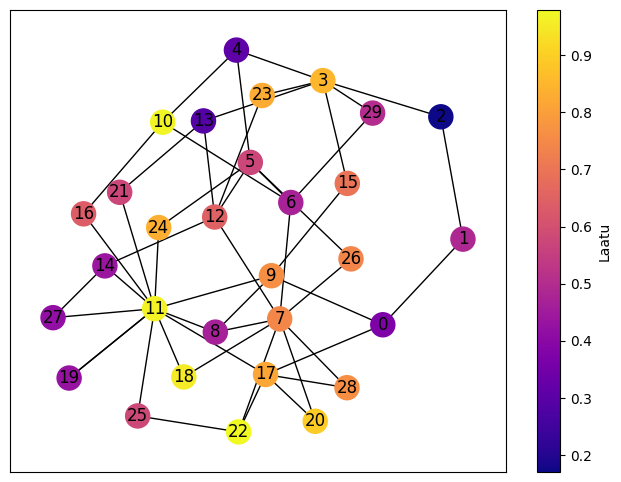

In [47]:
ex2_v, ex2_e = BB.generateBianconiBarabasi(30, e_amount=2, distr_type='uniform')
ex2_graph = nx.MultiGraph(ex2_e)

ex2_pos = nx.kamada_kawai_layout(ex2_graph)
v_colours = list(ex2_v.values())
fig = plt.figure(figsize=(8,6))
e_img = nx.draw_networkx_edges(ex2_graph, ex2_pos)
v_img = nx.draw_networkx_nodes(ex2_graph, ex2_pos, node_color=v_colours, cmap='plasma')
nx.draw_networkx_labels(ex2_graph, ex2_pos, font_color='black')
cbar = plt.colorbar(v_img)
cbar.ax.set_ylabel('Laatu')
plt.show()

Tehdään vielä simulaatio sadan solmun verkostolla ja piirretään lisäksi kuvaaja solmujen asteet ja laadut.

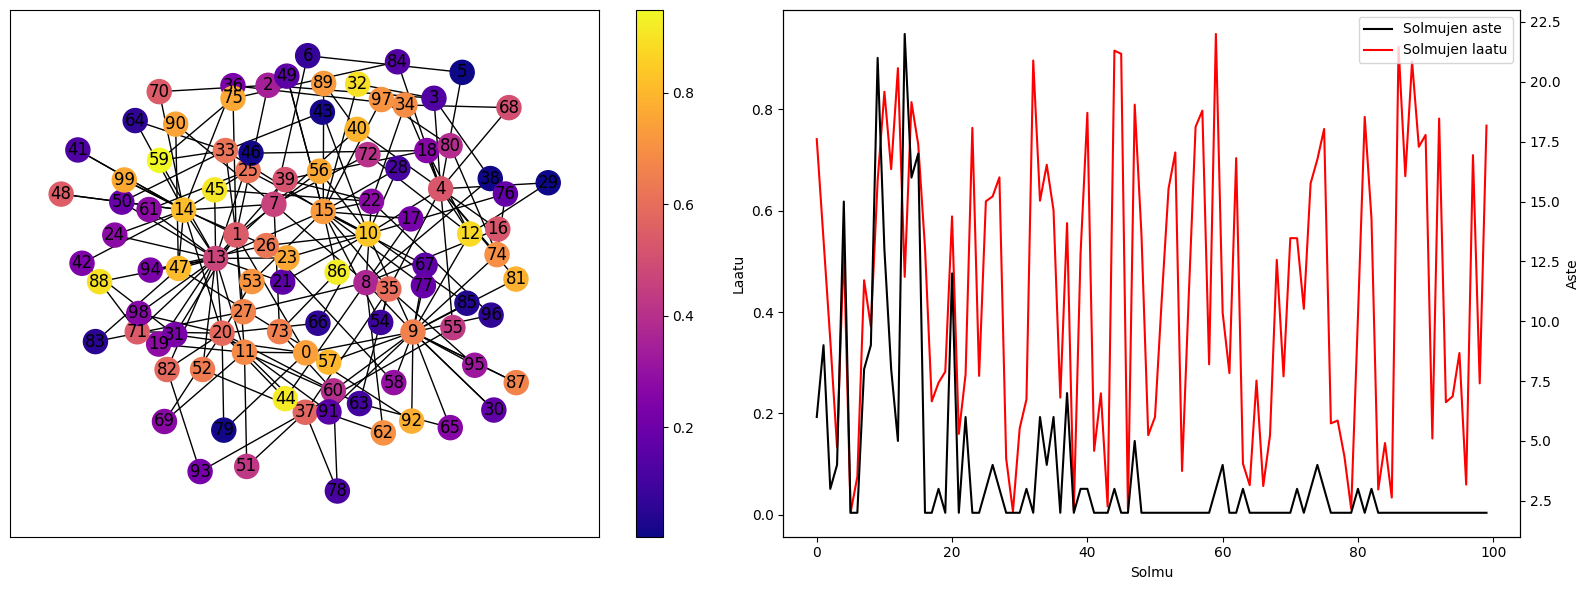

In [29]:
ex3_v, ex3_e = BB.generateBianconiBarabasi(100, e_amount=2, distr_type='uniform')
ex3_graph = nx.MultiGraph(ex3_e)

ex3_pos = nx.kamada_kawai_layout(ex3_graph)
v_colours = list(ex3_v.values())
fig, axes = plt.subplots(1, 2, figsize=(16,6))

e_img = nx.draw_networkx_edges(ex3_graph, ex3_pos, ax=axes[0])
v_img = nx.draw_networkx_nodes(ex3_graph, ex3_pos, ax=axes[0], node_color=v_colours, cmap='plasma')
nx.draw_networkx_labels(ex3_graph, ex3_pos, ax=axes[0], font_color='black')
plt.colorbar(v_img, ax=axes[0])

v_names, degrees = np.unique(ex3_e, return_counts=True)
axes3 = axes[1].twinx()
line1 = axes3.plot(v_names, degrees, label='Solmujen aste', c='black')
line2 = axes[1].plot(v_names, v_colours, label='Solmujen laatu', c='r')
lines = line1 + line2
axes3.set_ylabel('Aste')
axes[1].set_ylabel('Laatu')
axes[1].set_xlabel('Solmu')
axes[1].legend(lines, [line.get_label() for line in lines] , loc=1)

plt.tight_layout()
plt.show()

Laadun vaikutus nähdään paremmin BEC tyyppisellä jakaumalla:

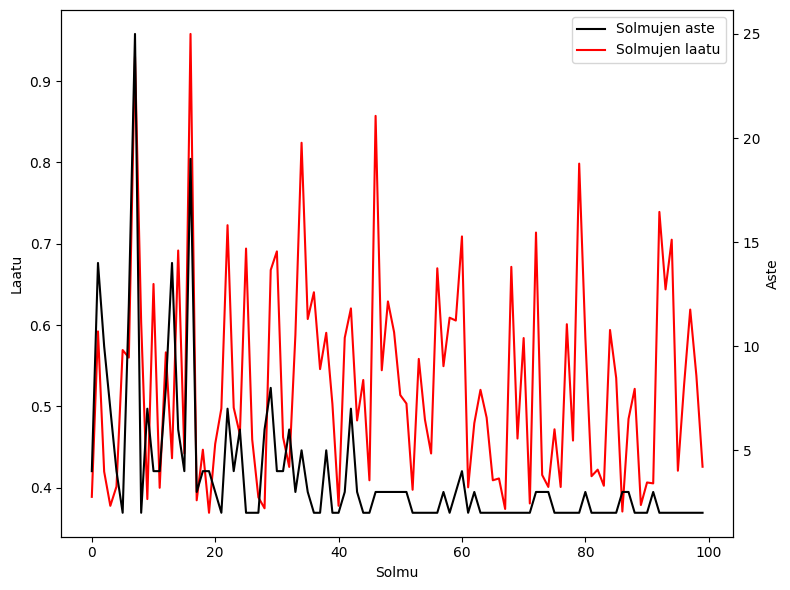

In [11]:
ex4_v, ex4_e = BB.generateBianconiBarabasi(100, e_amount=2, beta_constant=1.0, distr_type='BEC')

v_colours = list(ex4_v.values())
fig, axes= plt.subplots(figsize=(8,6))

v_names, degrees = np.unique(ex4_e, return_counts=True)
axes1 = axes.twinx()
line1 = axes1.plot(v_names, degrees, label='Solmujen aste', c='black')
line2 = axes.plot(v_names, v_colours, label='Solmujen laatu', c='r')
lines = line1 + line2
axes1.set_ylabel('Aste')
axes.set_ylabel('Laatu')
axes.set_xlabel('Solmu')
axes.legend(lines, [line.get_label() for line in lines] , loc=1)

plt.tight_layout()
plt.show()

### Solmujen asteet suuremmissa verkostoissa
Seuraavaksi haluamme tutkia minkälaisen astejakauman simulaatio tuottaa. Valitsemme parametreiksi sellaiset joita on käytetty Bianconin ja Barabásin artikkeleissa "Competition and multiscaling in evolving networks" ja "Bose-Einstein Condensation in Complex Networks". Testataan ensin täyssatunnaista verkostoa.

Generoimme miljoonan solmun verkoston ja piirrämme kuvaajan astejakaumasta. Oikealla on myös toinen kuvaaja, jossa käytetään logaritmisia pylväitä. Näemme ensimmäisessä kuvaajassa artikkelissa "Competition and multiscaling in evolving networks" mainitun käyttäytymisen, jossa astejakauma ei sovi täysin teorian ennusteeseen vaan verkosto sisältää enemmän suuren asteen omaavia solmuja.

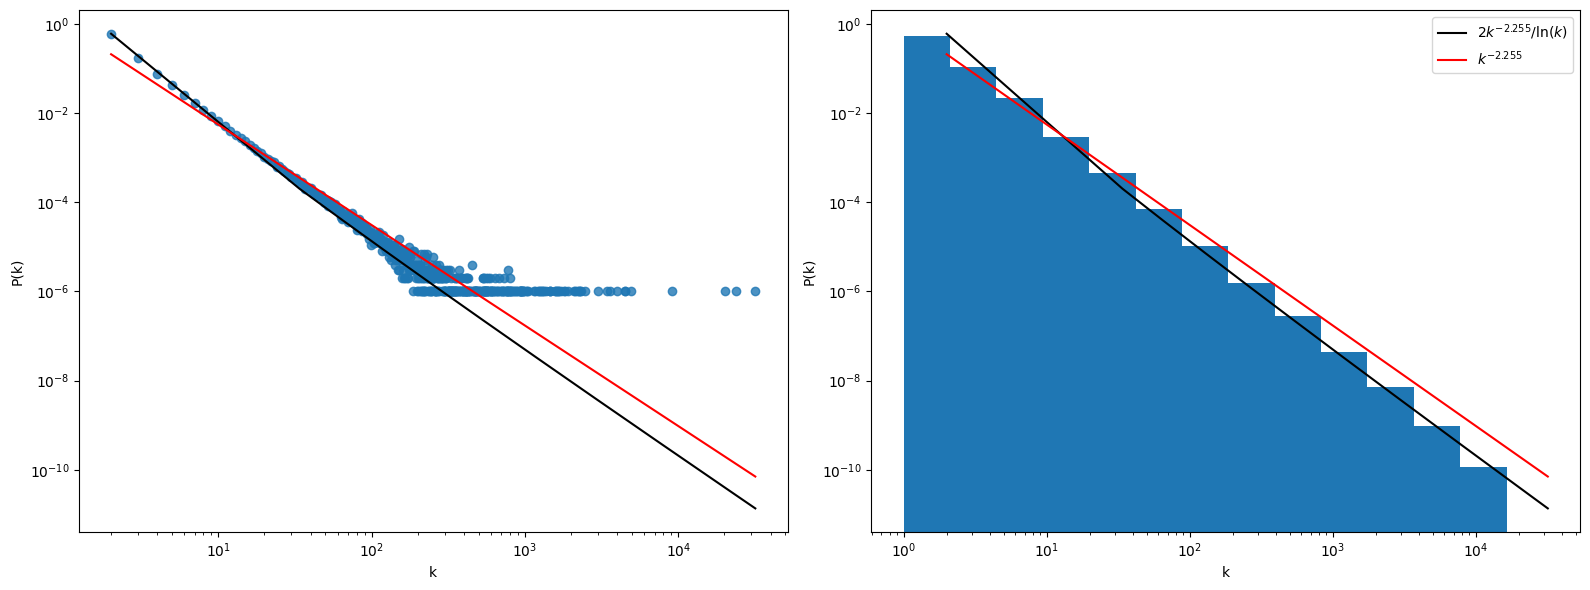

In [8]:
_, test_e = BB.generateBianconiBarabasi(1000000, 2, distr_type='uniform')

# test_graph = nx.MultiGraph(test_e)
# degree_distr = nx.degree_histogram(test_graph)
_, counts = np.unique(test_e, return_counts=True)
unique, degree_distr = np.unique(counts, return_counts=True)
degree_distr = degree_distr / np.sum(degree_distr)
# bin_start = np.array([0])
log_bins = np.logspace(0, 14, base=2, num=14, endpoint=True)
curve_range = np.linspace(2, unique.max(), 1000)

# kuvaaja
fig, axes = plt.subplots(1, 2, figsize=(16,6))
# axes.hist(counts, bins=curve_range, density=True)
axes[0].scatter(unique, degree_distr, alpha=0.8)
axes[1].hist(counts, bins=log_bins, density=True)

for i in range(2):
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].plot(curve_range, (2*(curve_range**(-2.255))/np.log(curve_range)), c='black', label=r'$2k^{-2.255}/\ln(k)$')
    axes[i].plot(curve_range, curve_range**(-2.255), c='r', label=r'$k^{-2.255}$')
    axes[i].set_ylabel(r'P(k)')
    axes[i].set_xlabel(r'k')
plt.legend(loc=0)
plt.tight_layout()
plt.show()

Seuraavaksi teemme BEC tyyppisen simulaation erilaisilla beta parametrin arvoilla ja verkoston koolla. Kuvaajasta näemme, että suurella betan arvolla suurimman asteen omaavan solmun osuus kaikista verkoston suorien päistä ei enää pienene vaan pysyy suunnilleen vakiona. Nämä arvot ovat kymmenen iteraation keskiarvoja.

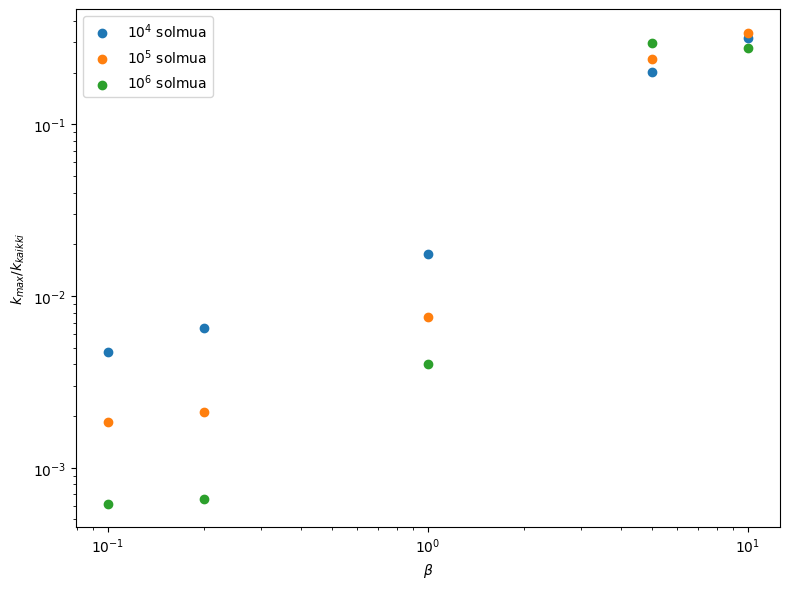

In [9]:
powers = [4, 5, 6]
betas = [0.1, 0.2, 1.0, 5.0, 10.0]

fig, axes = plt.subplots(figsize=(8,6))
for x in powers:
    results = []
    for b in betas:
        total = 0
        for i in range(10):
            _, ex_e = BB.generateBianconiBarabasi(10**x, 2, b, distr_type='BEC')
            _, degrees = np.unique(ex_e, return_counts=True)
            max_deg = np.max(degrees) / np.sum(degrees) # osamäärä kaikista suorien päistä
            total += max_deg
        results.append(total / 10)
    axes.scatter(betas, results, label=rf"$10^{x}$ solmua")
axes.legend(loc=0)
axes.set_xlabel(r'$\beta$')
axes.set_ylabel(r'$k_{max}/k_{kaikki}$')
axes.set_xscale('log')
axes.set_yscale('log')
plt.tight_layout()
plt.show()